# Solution of 2D Forward Problem of Linear Elasticity for Plane Stress Boundary Value Problem using Physics-Informed Neural Networks (PINN)

In [1]:
import torch
import torch.nn as nn
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import math

torch.manual_seed(123456)
np.random.seed(123456)

## 4. Generate random collocation points sampled from a uniform distribution in the interior (n = 2000 pairs) and boundary of the domain (n = 4*100 pairs). Concatenate all the sampled points and give as input to the trained model.


In [2]:
nb = 100

x_0 = torch.rand(100, requires_grad=True).unsqueeze(dim=1)
x_0 = torch.cat((x_0, torch.zeros_like(x_0)), dim = 1)

x_1 = torch.rand(100, requires_grad=True).unsqueeze(dim=1)
x_1 = torch.cat((x_1, torch.ones_like(x_1)), dim = 1)

y_0 = torch.rand(100, requires_grad=True).unsqueeze(dim=1)
y_0 = torch.cat((torch.zeros_like(y_0),y_0), dim = 1)

y_1 = torch.rand(100, requires_grad=True).unsqueeze(dim=1)
y_1 = torch.cat((torch.ones_like(y_1),y_1), dim = 1)

# Generate boundary points
boundary_test = torch.cat((x_0,x_1,y_0,y_1),dim=0)

# Generate internal points
ni = 2000
interior_test = torch.rand(ni,2, requires_grad = True)

## 5. Load the saved model using ‘torch.load()’


In [3]:
import torch.nn as nn
## Need architecture to load parameters using torch.load()
class Multiclass(nn.Module):
    def __init__(self):
        super(Multiclass, self).__init__()
        # Define your model here (refer: https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)
        self.Nnet = nn.Sequential()
        self.Nnet.add_module('Hidden_layer_1', nn.Linear(2,30))    # First linear layer
        self.Nnet.add_module('Tanh_layer_1', nn.Tanh())
        self.Nnet.add_module('Hidden_layer_2', nn.Linear(30,30))
        self.Nnet.add_module('Tanh_layer_2', nn.Tanh())
        self.Nnet.add_module('Hidden_layer_3', nn.Linear(30,30))
        self.Nnet.add_module('Tanh_layer_3', nn.Tanh())
        self.Nnet.add_module('Hidden_layer_4', nn.Linear(30,30))
        self.Nnet.add_module('Tanh_layer_4', nn.Tanh())
        self.Nnet.add_module('Hidden_layer_5', nn.Linear(30,30))
        self.Nnet.add_module('Tanh_layer_5', nn.Tanh())
        self.Nnet.add_module('Output Layer', nn.Linear(30,2))      
        print(self.Nnet)                                        # Print model summary

    # Forward Feed
    def forward(self, x):
        y = self.Nnet(x)
        return y
    


In [4]:
# Load the saved model

model = Multiclass()
model.load_state_dict(torch.load("model_2000.pth"))

Sequential(
  (Hidden_layer_1): Linear(in_features=2, out_features=30, bias=True)
  (Tanh_layer_1): Tanh()
  (Hidden_layer_2): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_2): Tanh()
  (Hidden_layer_3): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_3): Tanh()
  (Hidden_layer_4): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_4): Tanh()
  (Hidden_layer_5): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_5): Tanh()
  (Output Layer): Linear(in_features=30, out_features=2, bias=True)
)


<All keys matched successfully>

## 6. Test your trained model on the generated collocation points and plot the displacement field.

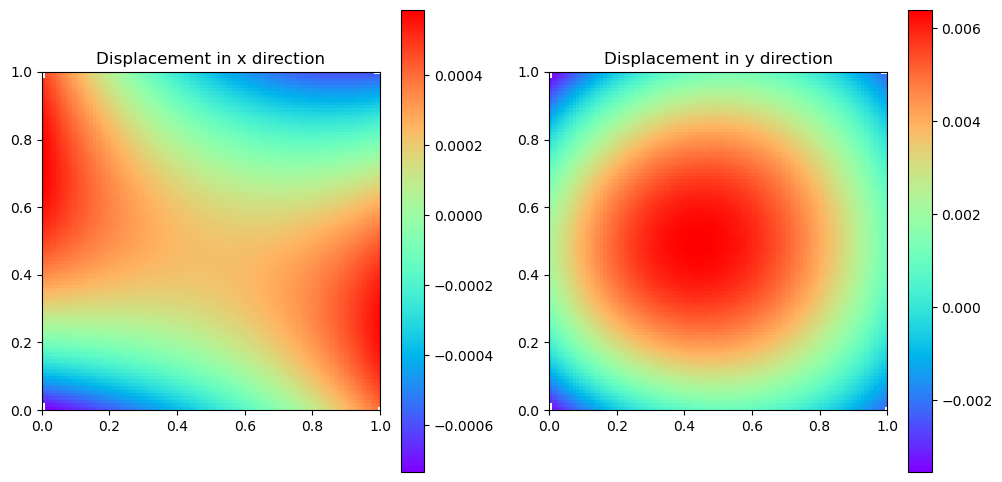

In [5]:
ui_preds = model.forward(interior_test)
ub_preds = model.forward(boundary_test)
u_preds = torch.cat((ui_preds, ub_preds), dim = 0).detach().numpy()
u_plot = u_preds[:,0]
v_plot = u_preds[:,1]
xy_all = torch.cat((interior_test, boundary_test), dim=0).detach().numpy()
x = xy_all[:,0]
y = xy_all[:,1]    
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolate the data onto the grid
U = griddata((x, y), u_plot, (X, Y), method='linear')
V = griddata((x, y), v_plot, (X, Y), method='linear')

# Plot the results
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
im1 = ax1.imshow(U, cmap='rainbow', extent=[x.min(), x.max(), y.min(), y.max()],origin='lower')
im2 = ax2.imshow(V, cmap='rainbow', extent=[x.min(), x.max(), y.min(), y.max()],origin='lower')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

ax1.set_title('Displacement in x direction')
ax2.set_title('Displacement in y direction')
plt.show()

# Model parameters trained after 10000 epochs

Sequential(
  (Hidden_layer_1): Linear(in_features=2, out_features=30, bias=True)
  (Tanh_layer_1): Tanh()
  (Hidden_layer_2): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_2): Tanh()
  (Hidden_layer_3): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_3): Tanh()
  (Hidden_layer_4): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_4): Tanh()
  (Hidden_layer_5): Linear(in_features=30, out_features=30, bias=True)
  (Tanh_layer_5): Tanh()
  (Output Layer): Linear(in_features=30, out_features=2, bias=True)
)


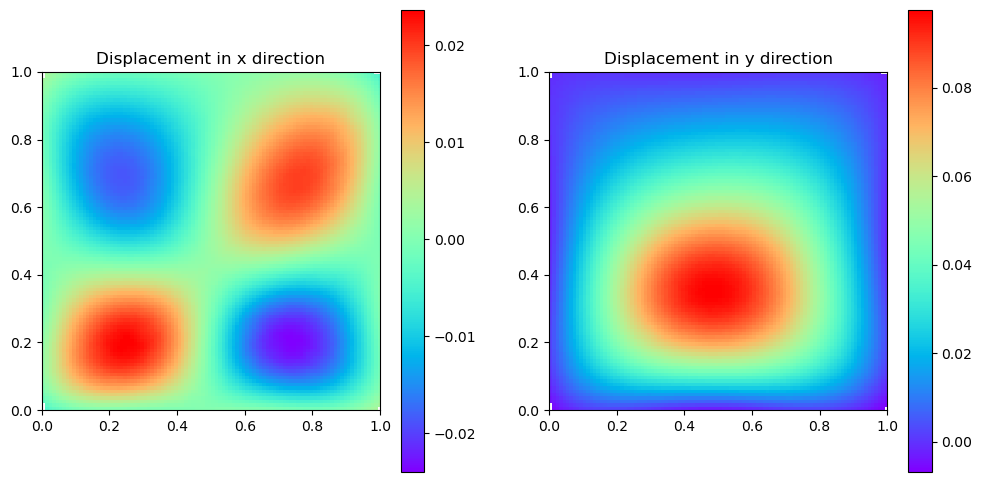

In [6]:
# Load the saved model

model2 = Multiclass()
model2.load_state_dict(torch.load("model_10000.pth"))

ui_preds = model2.forward(interior_test)
ub_preds = model2.forward(boundary_test)
u_preds = torch.cat((ui_preds, ub_preds), dim = 0).detach().numpy()
u_plot = u_preds[:,0]
v_plot = u_preds[:,1]
xy_all = torch.cat((interior_test, boundary_test), dim=0).detach().numpy()
x = xy_all[:,0]
y = xy_all[:,1]    
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolate the data onto the grid
U = griddata((x, y), u_plot, (X, Y), method='linear')
V = griddata((x, y), v_plot, (X, Y), method='linear')

# Plot the results
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
im1 = ax1.imshow(U, cmap='rainbow', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
im2 = ax2.imshow(V, cmap='rainbow', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

ax1.set_title('Displacement in x direction')
ax2.set_title('Displacement in y direction')
plt.show()